# Random Forest Classifier

## Libraries

In [25]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt

## Data ingestion

In [7]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

## Data cleaning

In [9]:
df_cleaned = df_raw.copy()

In [10]:
df_cleaned.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

In [11]:
df_cleaned = df_cleaned.drop(['education'], axis=1)
df_cleaned = pd.get_dummies(df_cleaned)
df_cleaned = df_cleaned.drop(['income_ <=50K'], axis=1)

In [12]:
X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1]

## Modeling

In [20]:
rf = RandomForestClassifier(n_estimators=50, random_state=2, n_jobs=-1)

In [21]:
scores = cross_val_score(rf, X, y, cv=5)

In [22]:
print('Accuracy:', np.round(scores, 3))
print('Accuracy mean:', np.round(scores.mean(), 3))

Accuracy: [0.856 0.854 0.857 0.86  0.859]
Accuracy mean: 0.857


## Parameters

### oob_score

In [18]:
rf = RandomForestClassifier(oob_score=True, n_estimators=50, random_state=2, n_jobs=-1)

In [19]:
rf.fit(X, y)
rf.oob_score_

0.8518780135745216

### n_estimators

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
scores = cross_val_score(rf, X, y, cv=5)
print('Accuracy:', np.round(scores, 3))
print('Accuracy mean:', np.round(scores.mean(), 3))

Accuracy: [0.858 0.855 0.858 0.862 0.86 ]
Accuracy mean: 0.859


### warm_start

In [26]:
sns.set()

oob_scores = []
rf = RandomForestClassifier(oob_score=True, warm_start=True, n_estimators=50, random_state=2, n_jobs=-1)
rf.fit(X, y)
oob_scores.append(rf.oob_score_)

In [27]:
%%time
est = 50
estimators = [est]

for i in range(9):
    est += 50
    estimators.append(est)
    rf.set_params(n_estimators=est)
    rf.fit(X, y)
    oob_scores.append(rf.oob_score_)

CPU times: total: 47 s
Wall time: 22.2 s


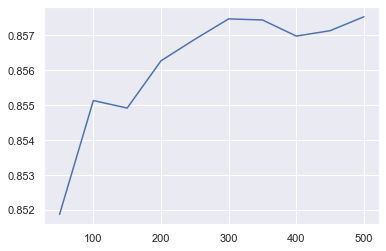

In [29]:
plt.plot(estimators, oob_scores)
plt.show()